In [41]:
import numpy as np
import matplotlib.pyplot as plt
import torch

from pathlib import Path

In [42]:
path = Path('./Data')

images_path = path/'images'
labels_path = path/'labels'

print(f'Checking number of files - images: {len([f for f in images_path.iterdir()])})\
      masks:{len([f for f in labels_path.iterdir()])}')
        
# Checking file shapes
idx = 22
img_path = [f for f in images_path.iterdir()][idx]
msk_path = [f for f in labels_path.iterdir()][idx]
      
img = np.load(str(img_path))
msk = np.load(str(msk_path))
      
print(f'Checking shapes - image: {img.shape} mask: {msk.shape}')

Checking number of files - images: 40)      masks:40
Checking shapes - image: (13, 366, 366) mask: (366, 366)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


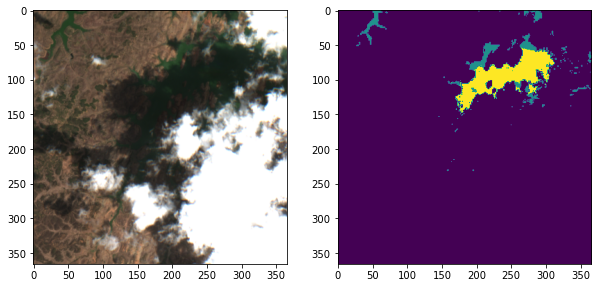

In [43]:
# Plotting a sample
_, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(img.transpose((1, 2, 0))[..., [3, 2, 1]]*3.0)
ax[1].imshow(msk)

In [44]:
def open_npy(fn, chnls=None, cls=torch.Tensor):
    im = torch.from_numpy(np.load(str(fn))).type(torch.float32)
    if chnls is not None:
        im = im[chnls]
    return cls(im)

class MSTensorImage(TensorImage):
    
    def __init__(self, x, chnls_first=False):
        self.chnls_first = chnls_first
        
    @classmethod
    def create(cls, data:(Path,str,ndarray), chnls=None, chnls_first=True):
        
        if isinstance(data, Path) or isinstance(data, str):
            if str(data).endswith('npy'): 
                im = open_npy(fn=data, chnls=chnls, cls=torch.Tensor)
        
        elif isinstance(data, ndarray):
            im = torch.from_numpy(data)
        else:
            im = data
            
        return cls(im, chnls_first=chnls_first)
    
    
    def show(self, chnls=[3, 2, 1], bright=1., ctx=None):
            
        if img.ndim > 2:
            visu_img = self[..., chnls] if not self.chnls_first else self.permute([1, 2, 0])[..., chnls]
        else:
            visu_img = self
            
        visu_img = squeeze()
        
        visu_img *= bright
        visu_img = np.where(visu_img > 1, 1, visu_img)
        visu_img = np.where(visu_img < 0, 0, visu_img)
        
        plt.imshow(visu_img) if ctx is None else ctx.imshow(visu_img)
        
        return ctx
    
    def __repr__(self):
        
        return (f'MSTensorImage: {self.shape}')

NameError: name 'TensorImage' is not defined